# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

import numpy as np
from matplotlib import pyplot as plt

# import our own code
from Household import HouseholdSpecializationModelClass

# Question 1

**Explain how you solve the model**

In [2]:
# a. load model as the household class
model = HouseholdSpecializationModelClass()

# b. defining the axis-values and empty H-ratio matrix for optimal solutions
N = 3
alpha_vec = np.linspace(0.25,0.75,N)
sigma_vec = np.linspace(0.5,1.5,N)
H_ratio = np.zeros((N,N))

# c. solve optimal allocation and input into H-ratio matrix
for i, alpha in enumerate(np.linspace(0.25,0.75,3)):
    model.par.alpha = alpha #set alpha value
    
    for j, sigma in enumerate(np.linspace(0.5,1.5,3)):
        model.par.sigma = sigma #set sigma value given the alpha value
        
        opt = model.solve_discrete() #optimal allocation solution
        HF = opt.HF
        HM = opt.HM
        H_ratio[i,j] = HF/HM #input H_ratio into matrix

print(H_ratio)

# d. resetting changed parameters
model.par.alpha = 0.5 
model.par.sigma = 1 

[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


Plotting the figure in 3d

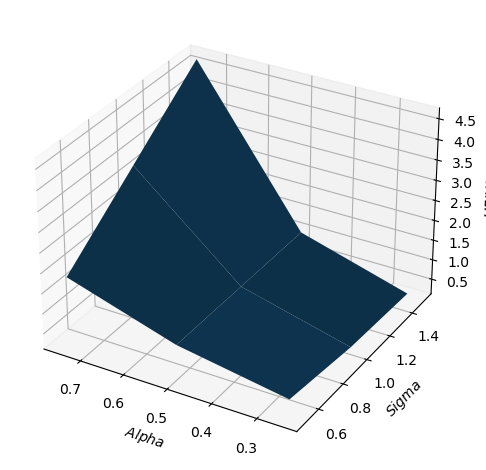

In [78]:
from matplotlib import cm # for colormaps
# %matplotlib widget

# a. 3d plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
alpha_mesh,sigma_mesh = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
ax.plot_surface(alpha_mesh,sigma_mesh,H_ratio)

# b. labels
ax.set_xlabel('$Alpha$') 
ax.set_ylabel('$Sigma$')
ax.set_zlabel('$HF/HM$')

# c. invert xaxis
ax.invert_xaxis()

# tight layout 
fig.tight_layout()

# Question 2

Explain your code and procedure

In [5]:
# a. solve the discrete solution and save the log of household work ratio
sol_discrete = model.solve_wF_vec(discrete=True)
logH_ratio_discrete = np.log(sol_discrete.HF_vec/sol_discrete.HM_vec)


Plot the solution

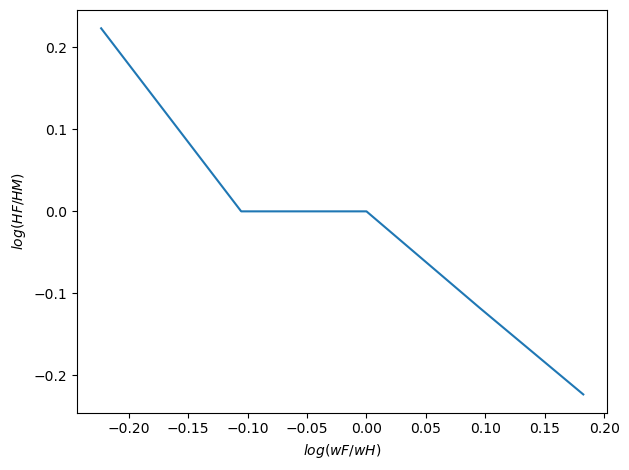

In [6]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio_discrete)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')

# tight layout 
fig.tight_layout()

# Question 3

Explain your code and procedure

In [7]:
# a. solve the continuous solution and save the log of household work ratio
sol = model.solve_wF_vec()
logH_ratio = np.log(sol.HF_vec/sol.HM_vec)

Plot the solution

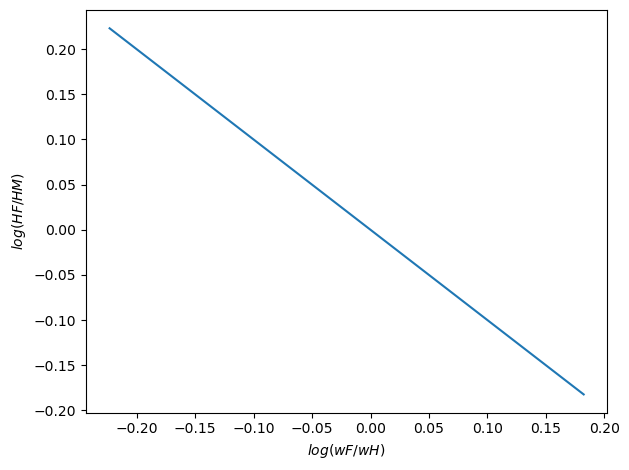

In [8]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.log(model.par.wF_vec),logH_ratio)

# b. labels
ax.set_xlabel('$log(wF/wH)$') 
ax.set_ylabel('$log(HF/HM)$')

# tight layout 
fig.tight_layout()

**Question 4**

In [84]:
# a. minimize the squared error using alpha and sigma
q4sol = model.estimate()

# b. print the solution, that minimizes the squared error
print(f'The squared error is minimized, when alpha is {model.par.alpha} and sigma is {model.par.sigma}. At these values our beta0 and beta1 coefficients are {model.sol.beta0} and {model.sol.beta1}. Thus the minimized squared error is then {(model.sol.beta0 - model.par.beta0_target)**2 +(model.sol.beta1 - model.par.beta1_target)**2}')


The squared error is minimized, when alpha is 0.982039811134529 and sigma is 0.09996452252683685. At these values our beta0 and beta1 coefficients are 0.40000529676838226 and -0.09996247337860992. Thus the minimized squared error is then 1.436303068250068e-09


ADD CONCISE CONLUSION.